In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

trainData_aggregations=pd.read_parquet('trainData_aggregations2.parquet')
train_csv = pd.read_csv('train.csv')


trainData1=trainData_aggregations
# Splitting the 'row_id' into 'stock_id' and 'time_id'
trainData1['stock_id'], trainData1['time_id'] = zip(
    *trainData1['row_id'].apply(lambda x: map(int, x.split('-')))
)


In [2]:
result = pd.merge(trainData1, train_csv, on=['stock_id', 'time_id'], how='left')
result.drop(columns=['row_id'], inplace=True)
result['stock_id'] = result['stock_id'].astype(int)
result['time_id'] = result['time_id'].astype(int)
result.head()

,ask1_bid1_spread_avg_0_10s_wide,ask1_bid1_spread_avg_1_10s_wide,ask1_bid1_spread_avg_2_10s_wide,ask1_bid1_spread_avg_3_10s_wide,ask1_bid1_spread_avg_4_10s_wide,ask1_bid1_spread_avg_5_10s_wide,ask1_bid1_spread_avg_6_10s_wide,ask1_bid1_spread_avg_7_10s_wide,ask1_bid1_spread_avg_8_10s_wide,ask1_bid1_spread_avg_9_10s_wide,...,wap2_log_high_low_53_10s_wide,wap2_log_high_low_54_10s_wide,wap2_log_high_low_55_10s_wide,wap2_log_high_low_56_10s_wide,wap2_log_high_low_57_10s_wide,wap2_log_high_low_58_10s_wide,wap2_log_high_low_59_10s_wide,stock_id,time_id,target
0,0.001705,0.001210,0.000970,0.000751,0.000606,0.000587,0.000989,0.001106,0.001082,0.000963,...,0.001226,0.000624,0.001536,0.000908,0.000738,0.001279,0.000000,6,5,0.007651
1,0.001521,0.001234,0.000996,0.000782,0.001436,0.001176,0.001193,0.000775,0.000648,0.001022,...,0.002143,0.000083,0.001137,0.000000,0.000129,0.000613,0.000329,6,11,0.004670
2,0.000266,0.000194,0.000296,0.000279,0.000257,0.000312,0.000287,0.000202,0.000219,0.000244,...,0.000375,0.000312,0.000255,0.000151,0.000098,0.001099,0.000655,6,16,0.004303
3,0.001288,0.000775,0.000814,0.000965,0.000599,0.000502,0.000669,0.000814,0.000937,0.000883,...,0.001374,0.000669,0.000621,0.002823,0.000866,0.000787,0.000289,6,31,0.005401
4,0.000558,0.000566,0.000303,0.000682,0.000672,0.000627,0.000667,0.000483,0.000431,0.000805,...,0.000783,0.000053,0.000053,0.000087,0.000408,0.000540,0.001064,6,62,0.004562


In [3]:
def visualize_target(target):
    
    print(f'{target}\n{"-" * len(target)}')
        
    print(f'Mean: {result[target].mean():.4f}  -  Median: {result[target].median():.4f}  -  Std: {result[target].std():.4f}')
    print(f'Min: {result[target].min():.4f}  -  25%: {result[target].quantile(0.25):.4f}  -  50%: {result[target].quantile(0.5):.4f}  -  75%: {result[target].quantile(0.75):.4f}  -  Max: {result[target].max():.4f}')
    print(f'Skew: {result[target].skew():.4f}  -  Kurtosis: {result[target].kurtosis():.4f}')

In [4]:
target=result['target']
visualize_target('target')

target
------
Mean: 0.0039  -  Median: 0.0030  -  Std: 0.0029
Min: 0.0001  -  25%: 0.0020  -  50%: 0.0030  -  75%: 0.0047  -  Max: 0.0703
Skew: 2.8226  -  Kurtosis: 14.9611


In [5]:
df = result.filter(like='price', axis=1)
common_columns = set(result.columns).intersection(df.columns)
result = result.drop(columns=common_columns)

# most volatile buckets

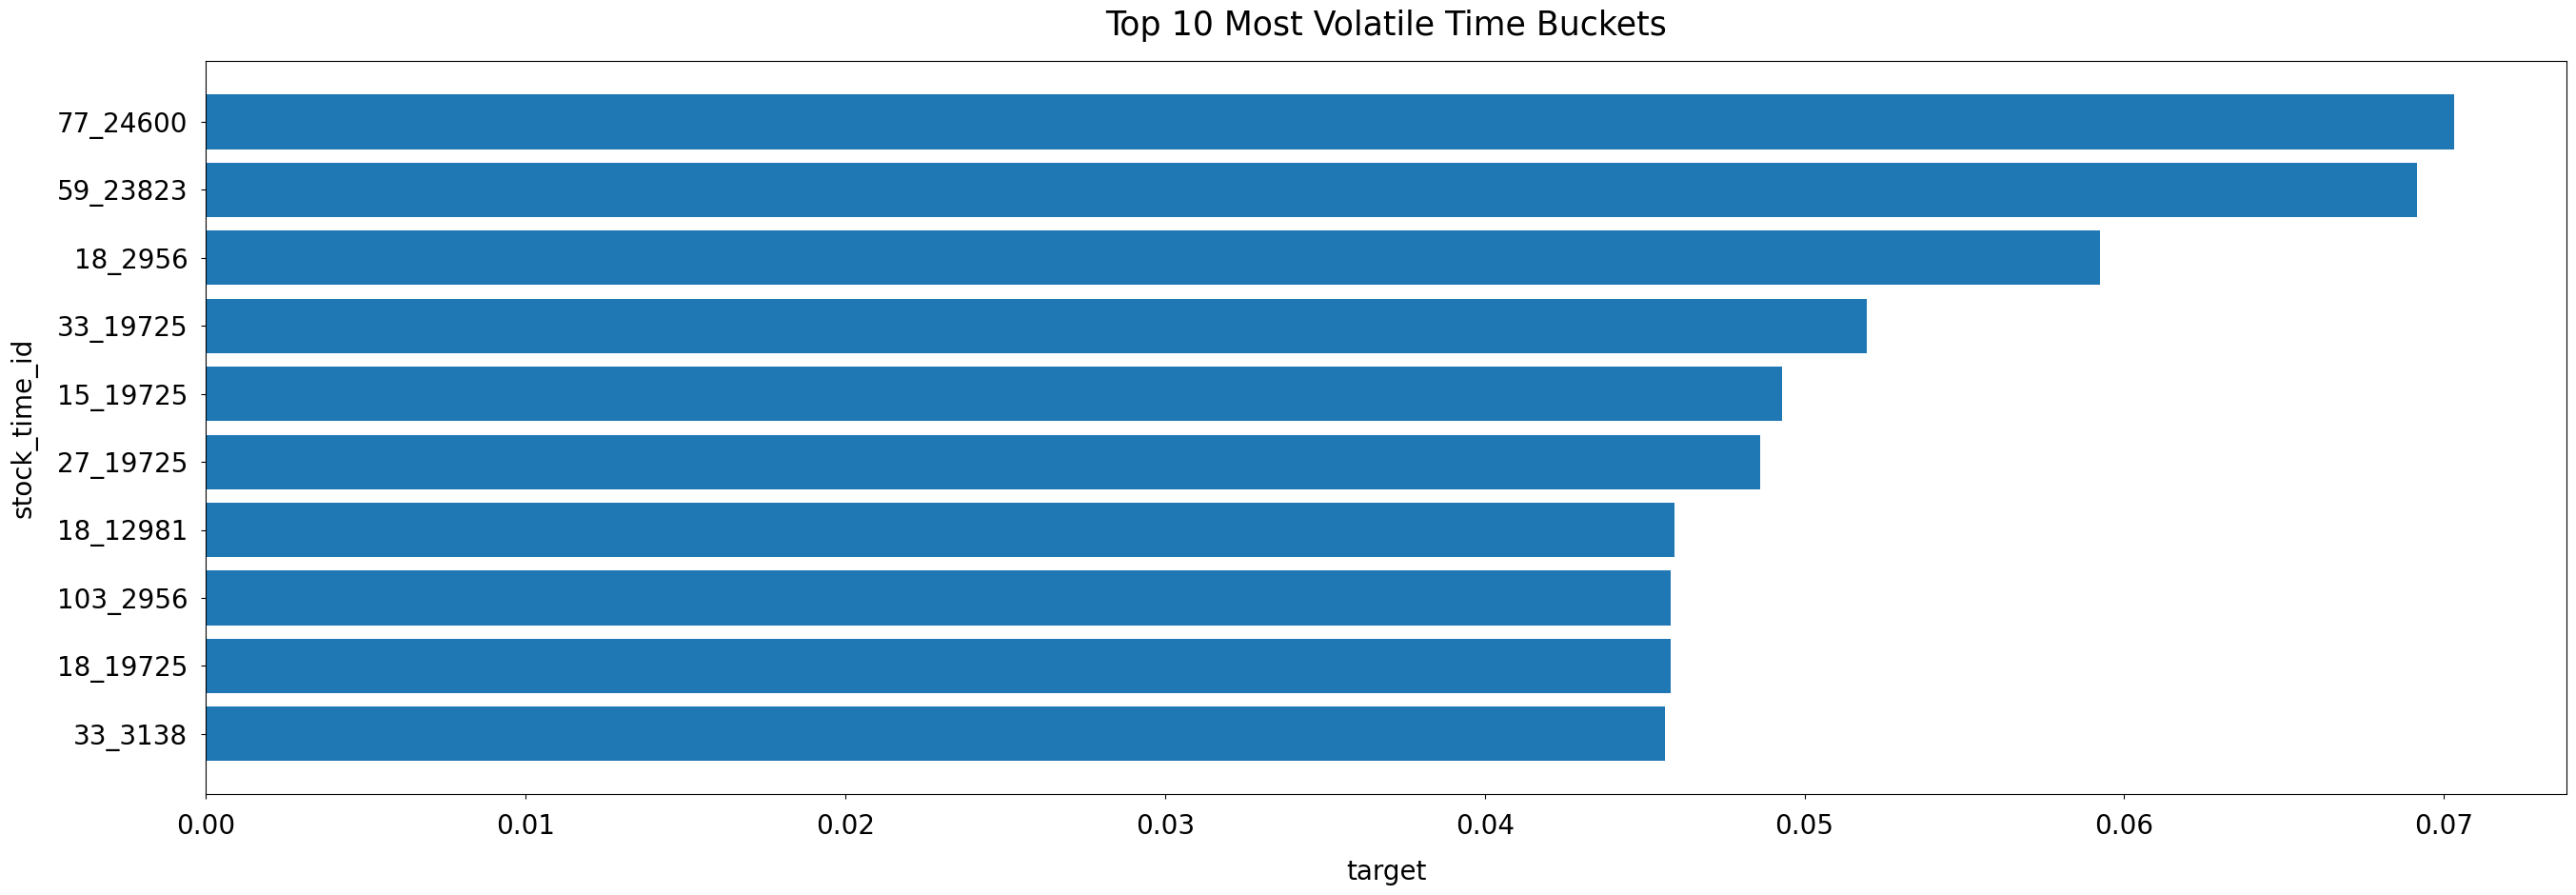

In [6]:

result['stock_time_id'] = result['stock_id'].astype(str) + '_' + result['time_id'].astype(str)

fig, ax = plt.subplots(figsize=(32, 10))
ax.barh(
    y=np.arange(10),
    width=result.sort_values(by='target', ascending=True).tail(10)['target'],
    align='center',
    ecolor='black',
)

ax.set_yticks(np.arange(10))
ax.set_yticklabels(result.sort_values(by='target', ascending=True).tail(10)['stock_time_id'])
ax.set_xlabel('target', size=20, labelpad=15)
ax.set_ylabel('stock_time_id', size=20, labelpad=15)
ax.tick_params(axis='x', labelsize=20, pad=10)
ax.tick_params(axis='y', labelsize=20, pad=10)
ax.set_title('Top 10 Most Volatile Time Buckets', size=25, pad=20)

plt.show()

result.drop(columns=['stock_time_id'], inplace=True)

In [7]:
data = pd.read_parquet("book_train.parquet/stock_id=77")
selected_rows = data[data['time_id'] == 24600]
data=selected_rows
data.head()
data.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
count,587.0,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,24600.0,300.100511,0.968520,0.969116,0.967962,0.969616,1539.781942,10074.340716,650.991482,2299.879046
std,0.0,173.382476,0.007142,0.007174,0.007122,0.007177,1434.390224,10935.843421,861.332249,3336.787712
min,24600.0,0.000000,0.952664,0.953656,0.952169,0.954151,30.000000,16.000000,100.000000,100.000000
25%,24600.0,149.500000,0.963569,0.964064,0.963073,0.964560,500.000000,2100.000000,200.000000,700.000000
50%,24600.0,299.000000,0.970012,0.970508,0.969517,0.971004,1100.000000,5950.000000,300.000000,1500.000000
75%,24600.0,451.500000,0.972986,0.973482,0.971995,0.973978,2186.500000,14039.500000,700.000000,2100.000000
max,24600.0,599.000000,0.987856,0.988848,0.987361,0.989343,8021.000000,48222.000000,5318.000000,38112.000000


In [8]:
data_trade = pd.read_parquet("trade_train.parquet/stock_id=77")
selected_rows_trade = data_trade[data_trade['time_id'] == 24600]
data_trade=selected_rows_trade
data_trade.head()
data_trade['price'].describe()

count    228.000000
mean       0.967988
std        0.008015
min        0.953002
25%        0.960471
50%        0.969269
75%        0.974071
max        0.987993
Name: price, dtype: float64

# plot most volatile bucket features

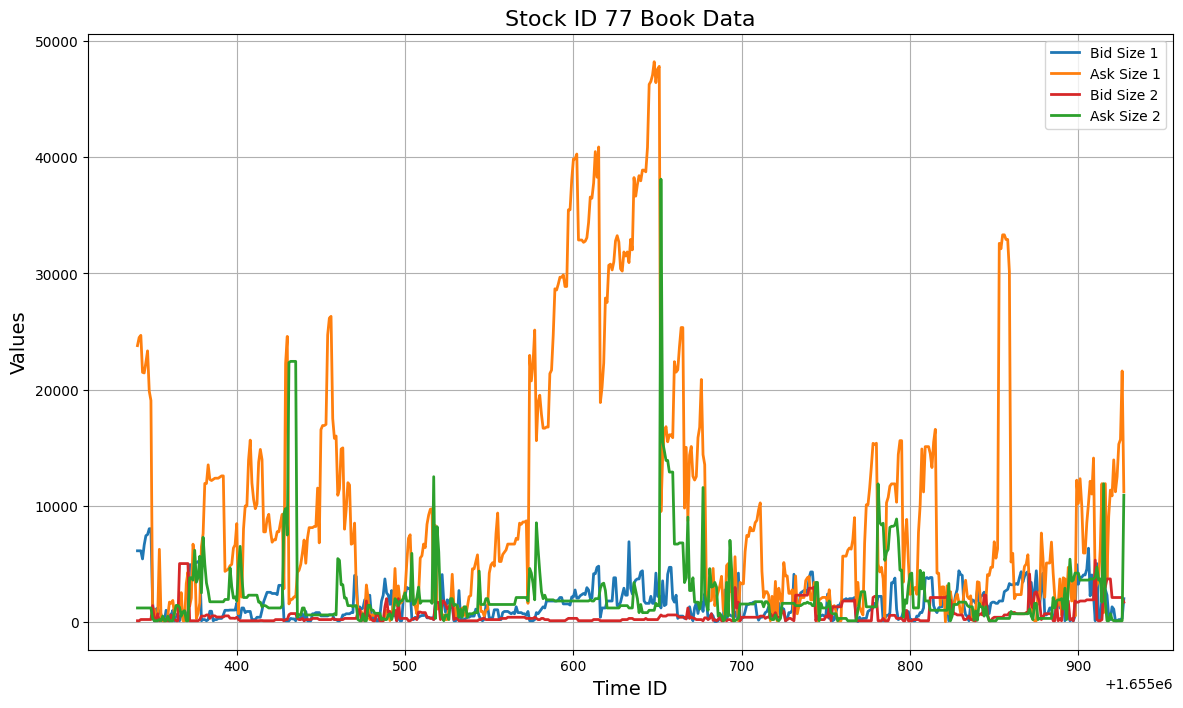

In [9]:

plt.figure(figsize=(14, 8))

plt.plot( data['bid_size1'], label='Bid Size 1', lw=2, color='tab:blue')
plt.plot( data['ask_size1'], label='Ask Size 1', lw=2, color='tab:orange')
plt.plot( data['bid_size2'], label='Bid Size 2', lw=2, color='tab:red')
plt.plot( data['ask_size2'], label='Ask Size 2', lw=2, color='tab:green')

# Customize the plot
plt.xlabel('Time ID', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Stock ID 77 Book Data', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

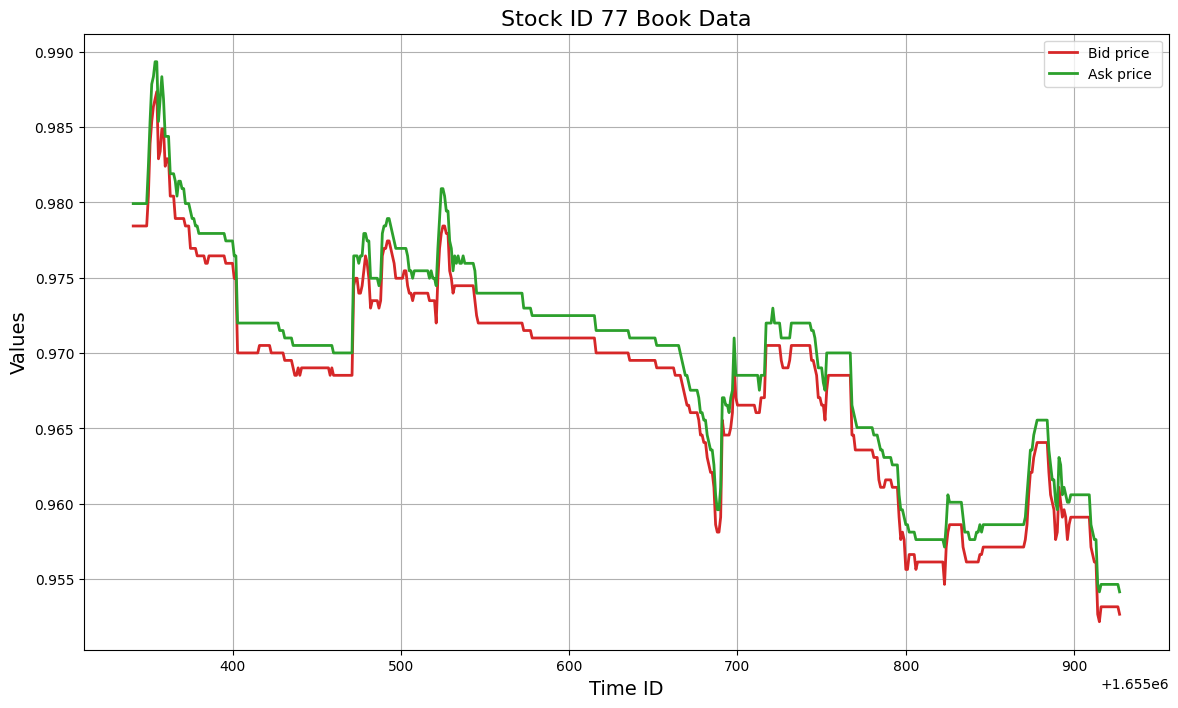

In [10]:
plt.figure(figsize=(14, 8))



plt.plot( data['bid_price2'], label='Bid price ', lw=2, color='tab:red')
plt.plot( data['ask_price2'], label='Ask price ', lw=2, color='tab:green')

# Customize the plot
plt.xlabel('Time ID', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Stock ID 77 Book Data', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# least volatile

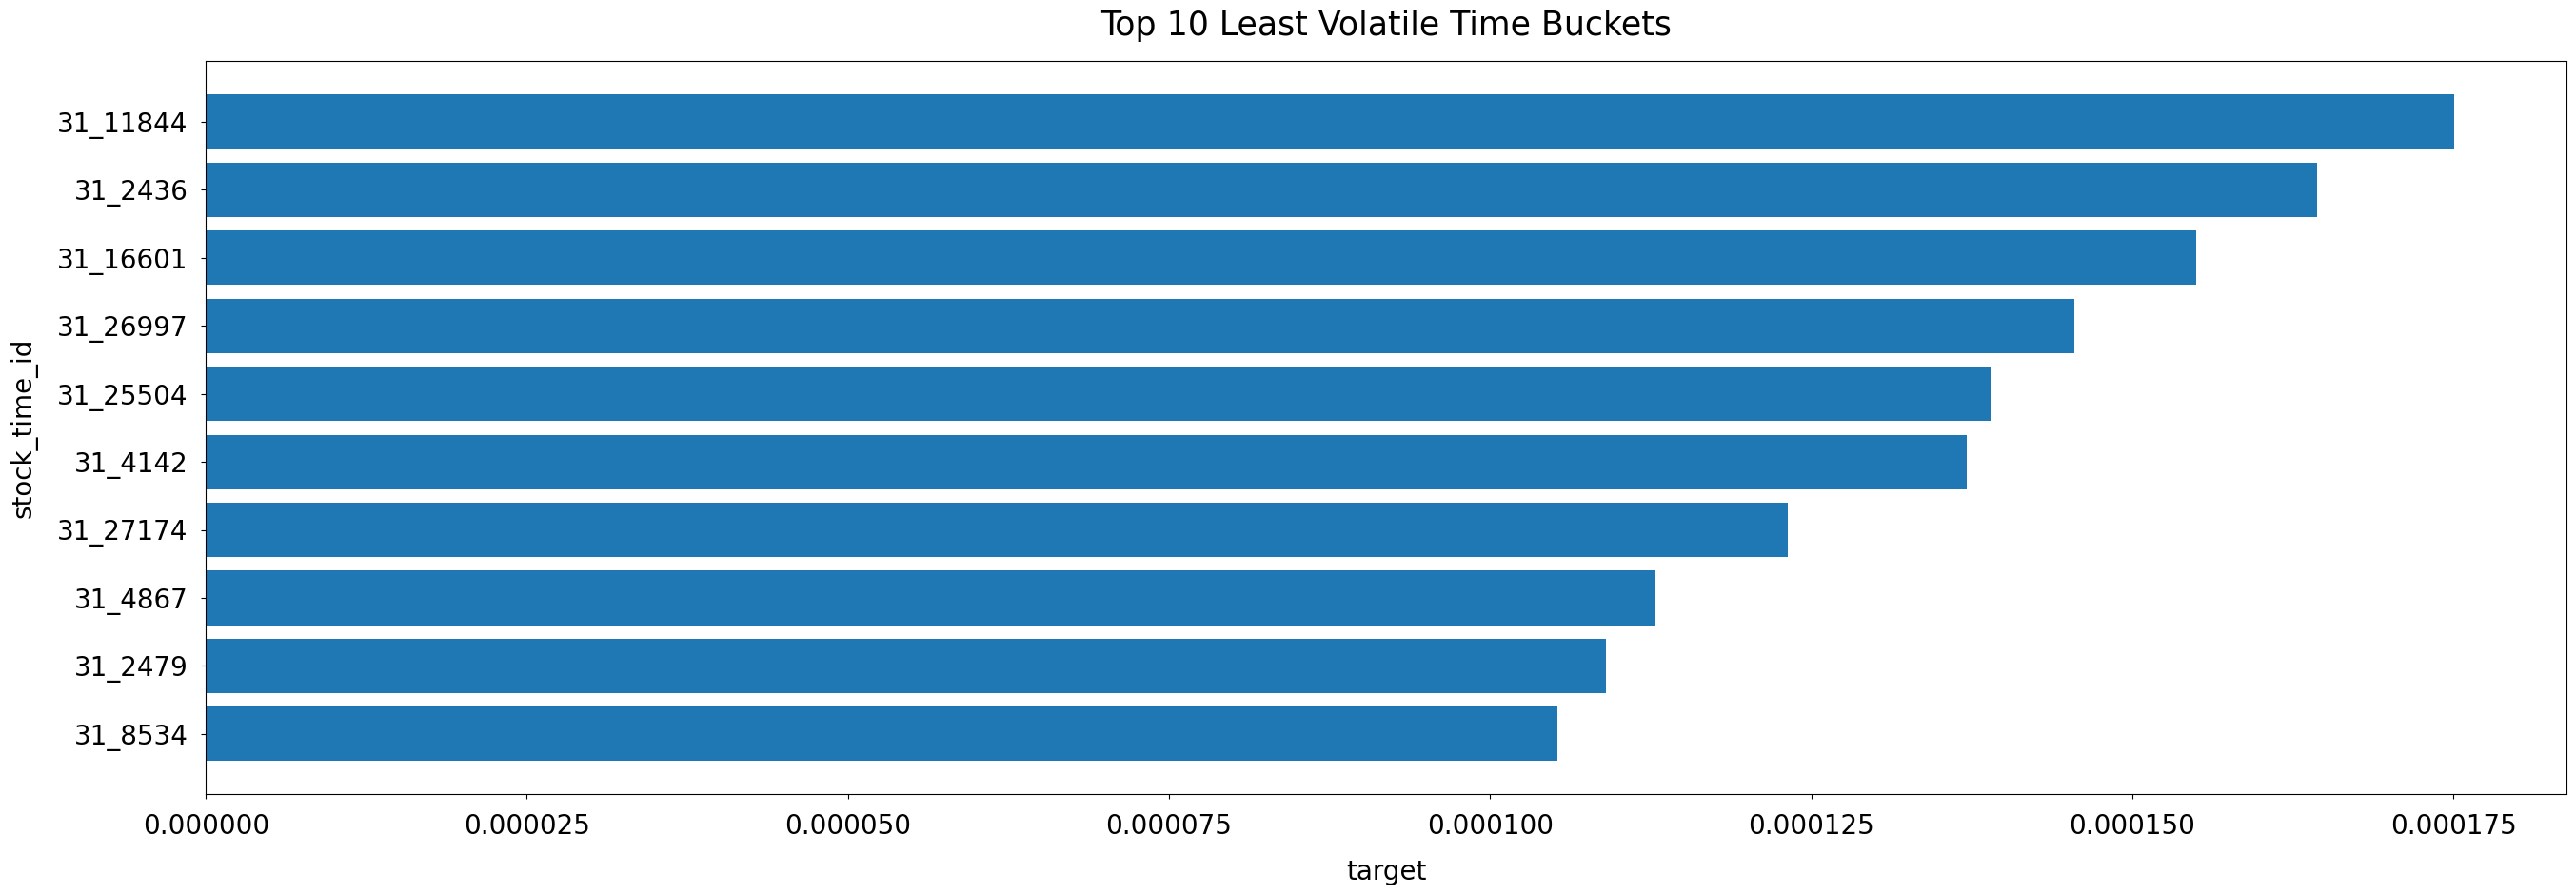

In [11]:
result['stock_time_id'] =result['stock_id'].astype(str) + '_' + result['time_id'].astype(str)

fig, ax = plt.subplots(figsize=(32, 10))
ax.barh(
    y=np.arange(10),
    width=result.sort_values(by='target', ascending=True).head(10)['target'],
    align='center',
    ecolor='black',
)

ax.set_yticks(np.arange(10))
ax.set_yticklabels(result.sort_values(by='target', ascending=True).head(10)['stock_time_id'])
ax.set_xlabel('target', size=20, labelpad=15)
ax.set_ylabel('stock_time_id', size=20, labelpad=15)
ax.tick_params(axis='x', labelsize=20, pad=10)
ax.tick_params(axis='y', labelsize=20, pad=10)
ax.set_title('Top 10 Least Volatile Time Buckets', size=25, pad=20)

plt.show()

result.drop(columns=['stock_time_id'], inplace=True)

In [12]:
data = pd.read_parquet("book_train.parquet/stock_id=31")
selected_rows = data[data['time_id'] == 11844]
data=selected_rows
data.head()
data.describe()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
count,423.0,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,11844.0,302.645390,0.996796,0.998334,0.995259,0.999871,87542.985816,141486.680851,99982.314421,119786.777778
std,0.0,174.953175,0.000759,0.000759,0.000759,0.000759,47182.202513,30536.503598,67282.332134,12913.208221
min,11844.0,0.000000,0.996157,0.997694,0.994620,0.999231,13979.000000,28170.000000,42023.000000,101781.000000
25%,11844.0,151.500000,0.996157,0.997694,0.994620,0.999231,27579.000000,120438.000000,43323.000000,104481.000000
50%,11844.0,313.000000,0.996157,0.997694,0.994620,0.999231,117473.000000,146385.000000,43723.000000,129248.000000
75%,11844.0,453.500000,0.997694,0.999231,0.996157,1.000769,120588.000000,167577.000000,178571.000000,131298.000000
max,11844.0,598.000000,0.997694,0.999231,0.996157,1.000769,191692.000000,186430.000000,186569.000000,132351.000000


In [13]:
data_trade = pd.read_parquet("trade_train.parquet/stock_id=31")
data_trade= data_trade[data_trade['time_id'] == 11844]
data_trade.head()
data_trade['price'].describe()

count    11.000000
mean      0.997694
std       0.000000
min       0.997694
25%       0.997694
50%       0.997694
75%       0.997694
max       0.997694
Name: price, dtype: float64

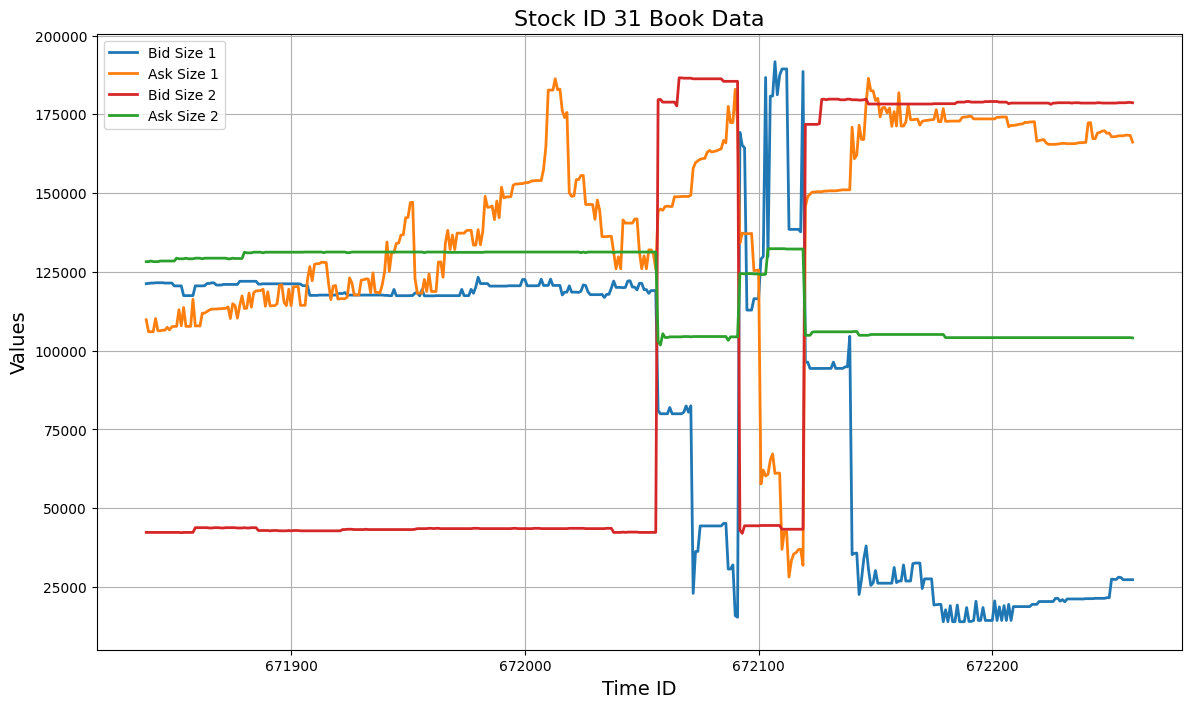

In [14]:
# Plot the data
plt.figure(figsize=(14, 8))

plt.plot( data['bid_size1'], label='Bid Size 1', lw=2, color='tab:blue')
plt.plot( data['ask_size1'], label='Ask Size 1', lw=2, color='tab:orange')
plt.plot( data['bid_size2'], label='Bid Size 2', lw=2, color='tab:red')
plt.plot( data['ask_size2'], label='Ask Size 2', lw=2, color='tab:green')

# Customize the plot
plt.xlabel('Time ID', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Stock ID 31 Book Data', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

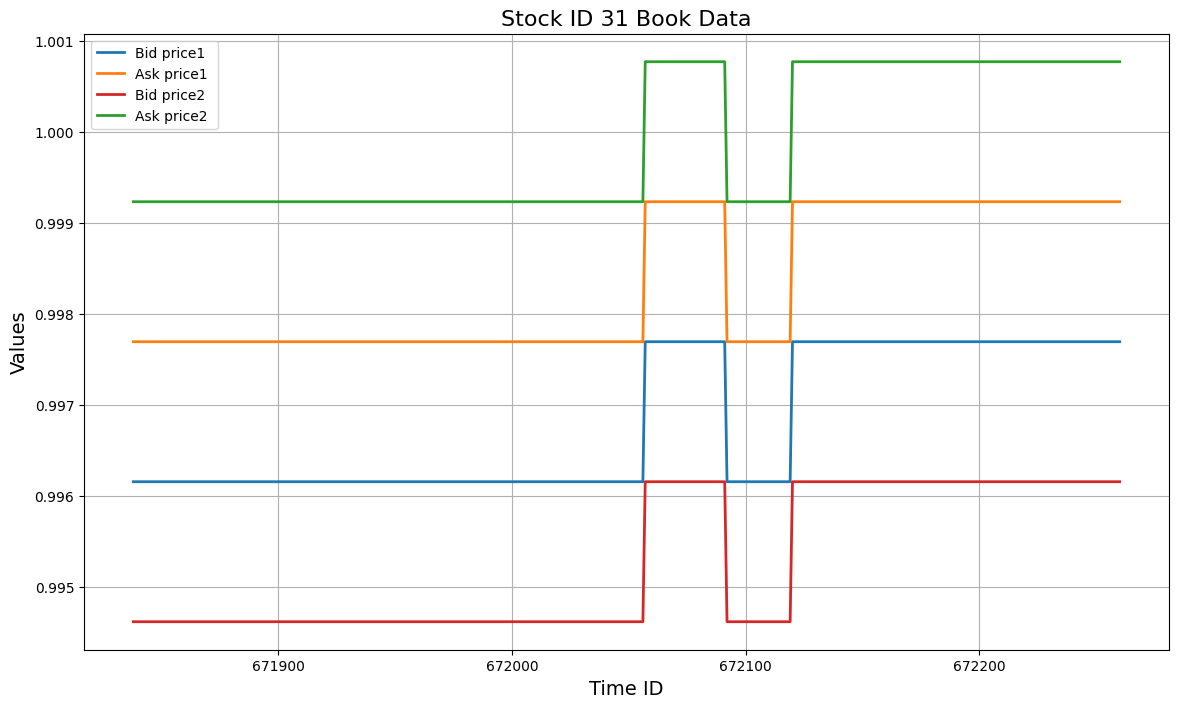

In [17]:


# Plot the data
plt.figure(figsize=(14, 8))

plt.plot( data['bid_price1'], label='Bid price1 ', lw=2, color='tab:blue')
plt.plot( data['ask_price1'], label='Ask price1 ', lw=2, color='tab:orange')
plt.plot( data['bid_price2'], label='Bid price2 ', lw=2, color='tab:red')
plt.plot( data['ask_price2'], label='Ask price2 ', lw=2, color='tab:green')


# Customize the plot
plt.xlabel('Time ID', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Stock ID 31 Book Data', fontsize=16)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

 # Target variable 

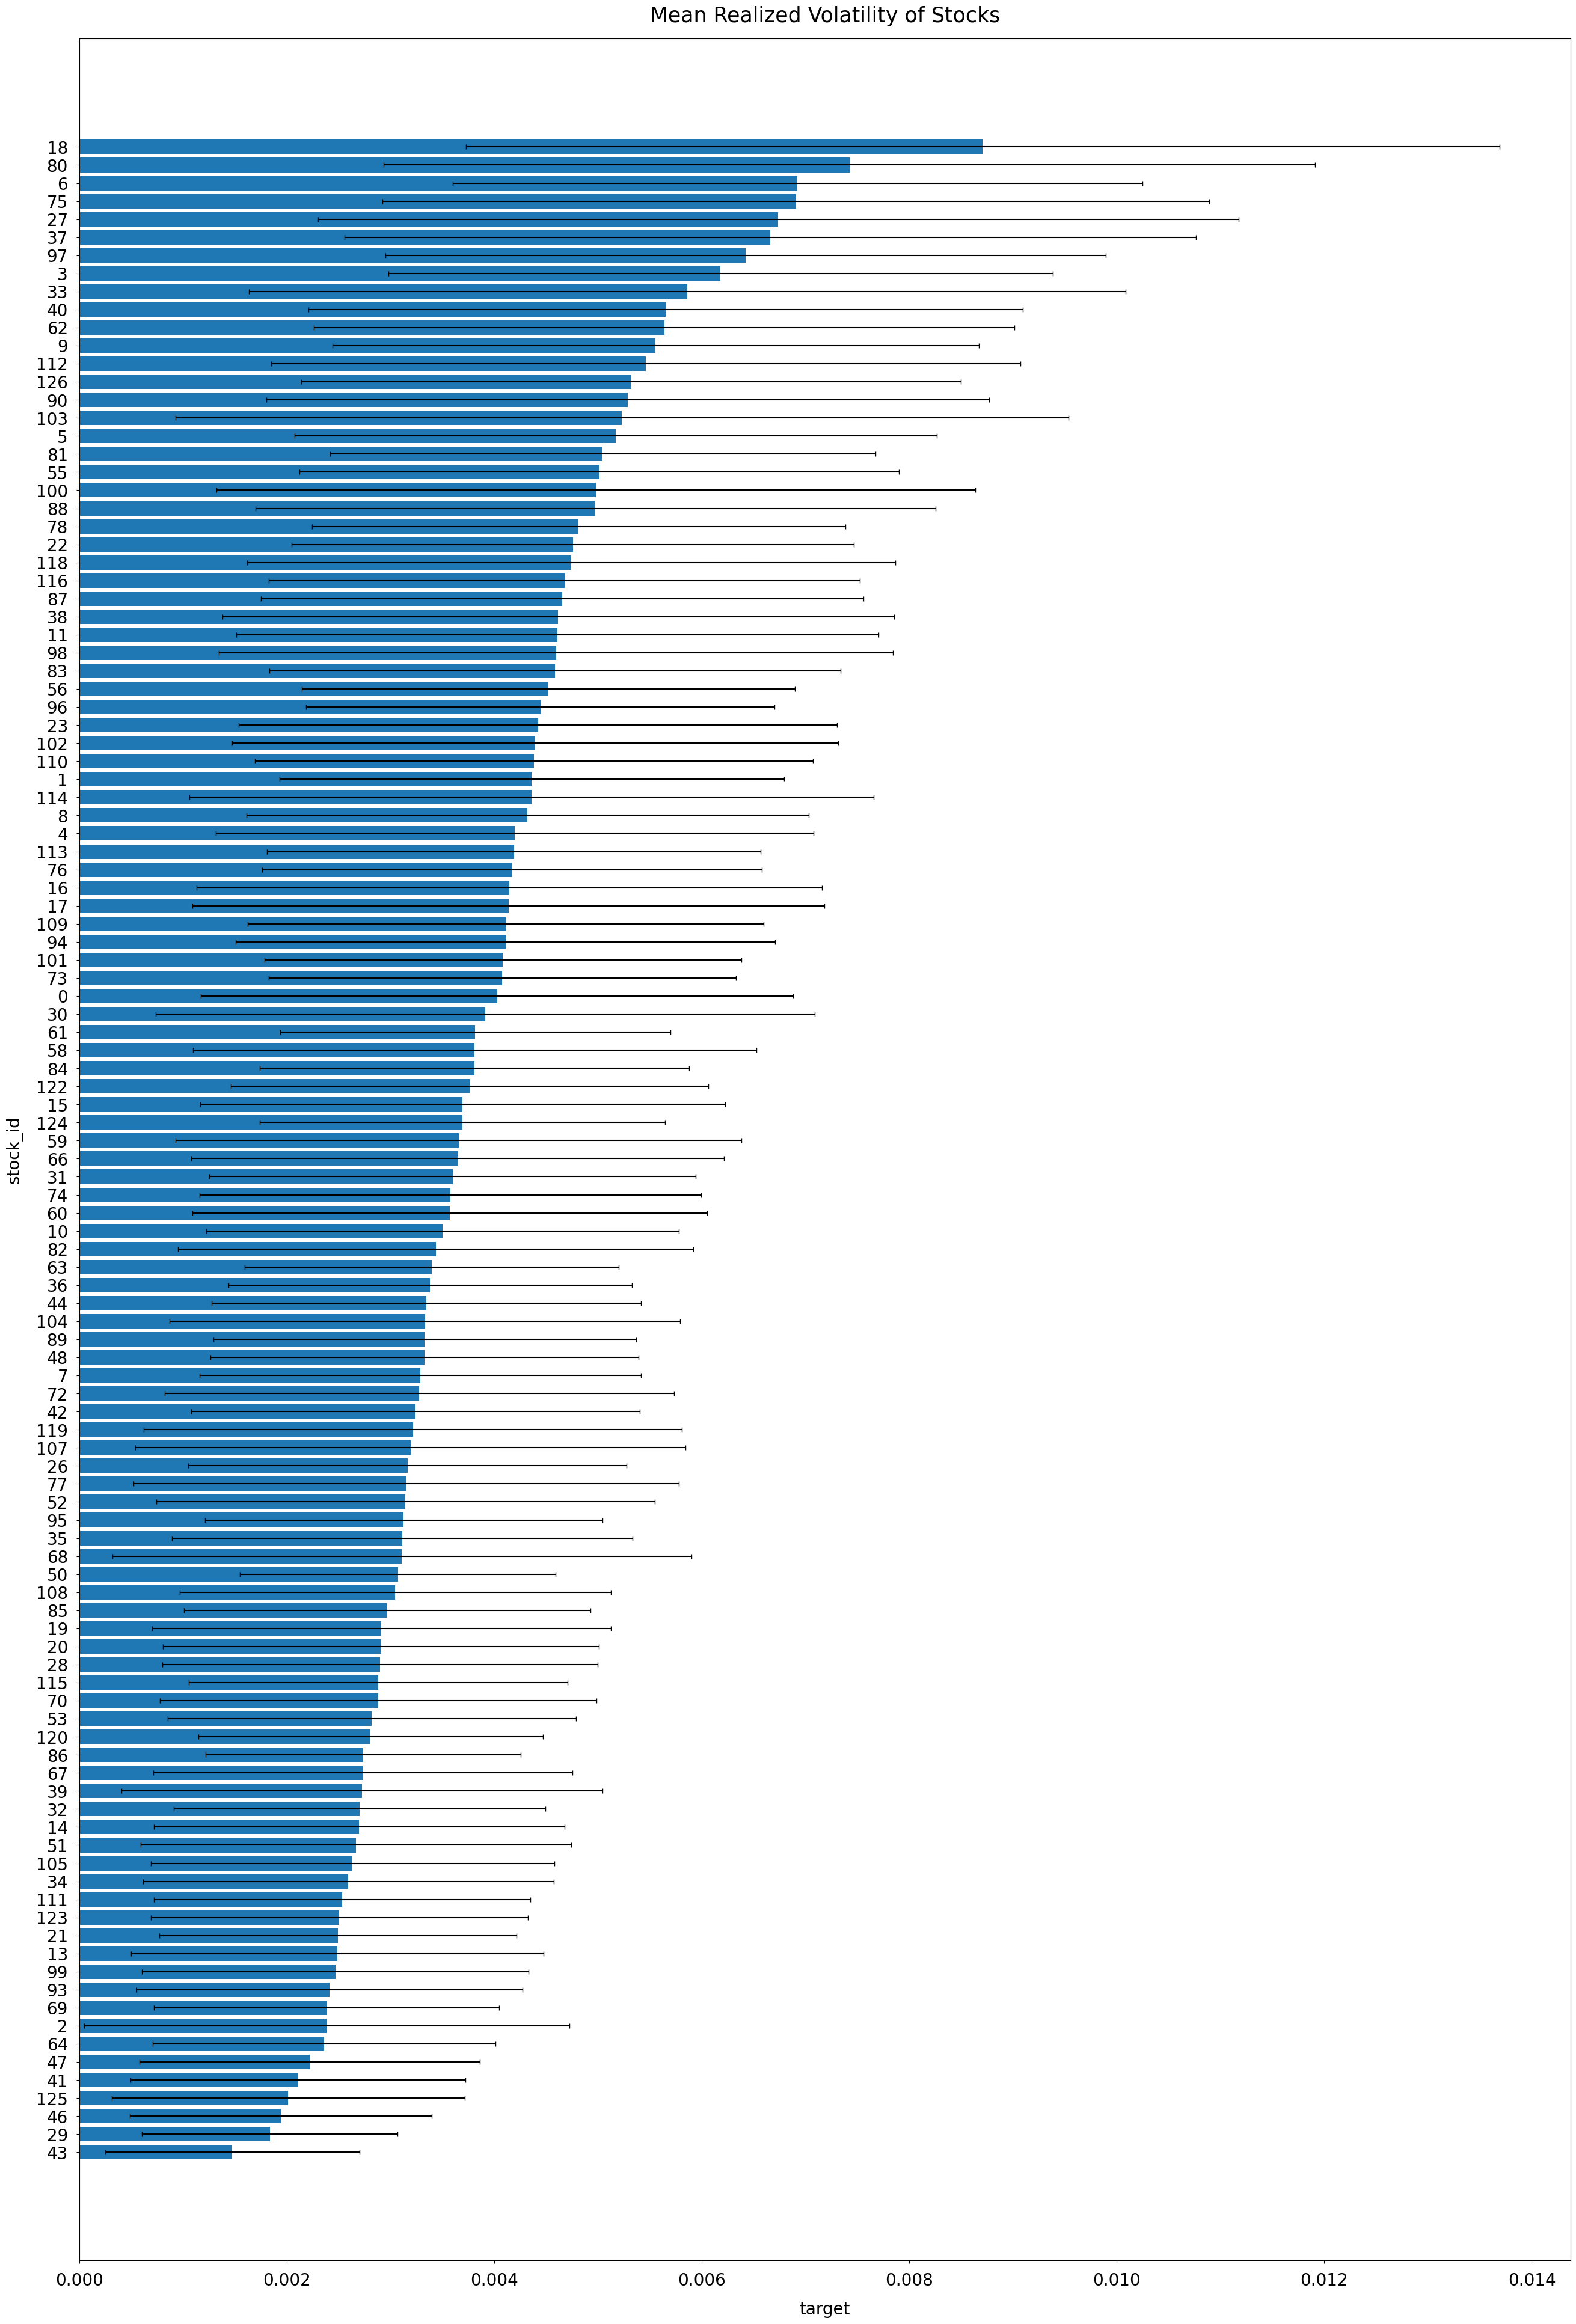

In [18]:
target_means = result.groupby('stock_id')['target'].mean()
target_stds = result.groupby('stock_id')['target'].std()

target_means_and_stds = pd.concat([target_means, target_stds], axis=1)
target_means_and_stds.columns = ['mean', 'std']
target_means_and_stds.sort_values(by='mean', ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(32, 48))
ax.barh(
    y=np.arange(len(target_means_and_stds)),
    width=target_means_and_stds['mean'],
    xerr=target_means_and_stds['std'],
    align='center',
    ecolor='black',
    capsize=3
)

ax.set_yticks(np.arange(len(target_means_and_stds)))
ax.set_yticklabels(target_means_and_stds.index)
ax.set_xlabel('target', size=20, labelpad=15)
ax.set_ylabel('stock_id', size=20, labelpad=15)
ax.tick_params(axis='x', labelsize=20, pad=10)
ax.tick_params(axis='y', labelsize=20, pad=10)
ax.set_title('Mean Realized Volatility of Stocks', size=25, pad=20)

plt.show()


del target_means, target_stds, target_means_and_stds

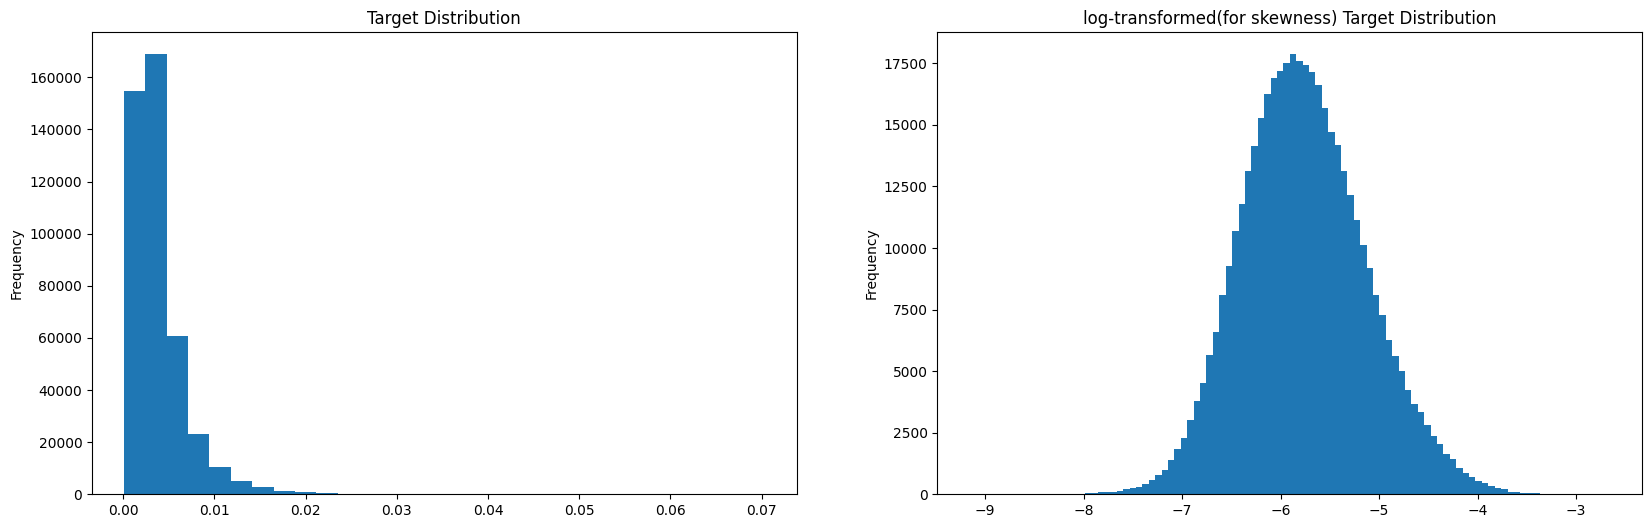

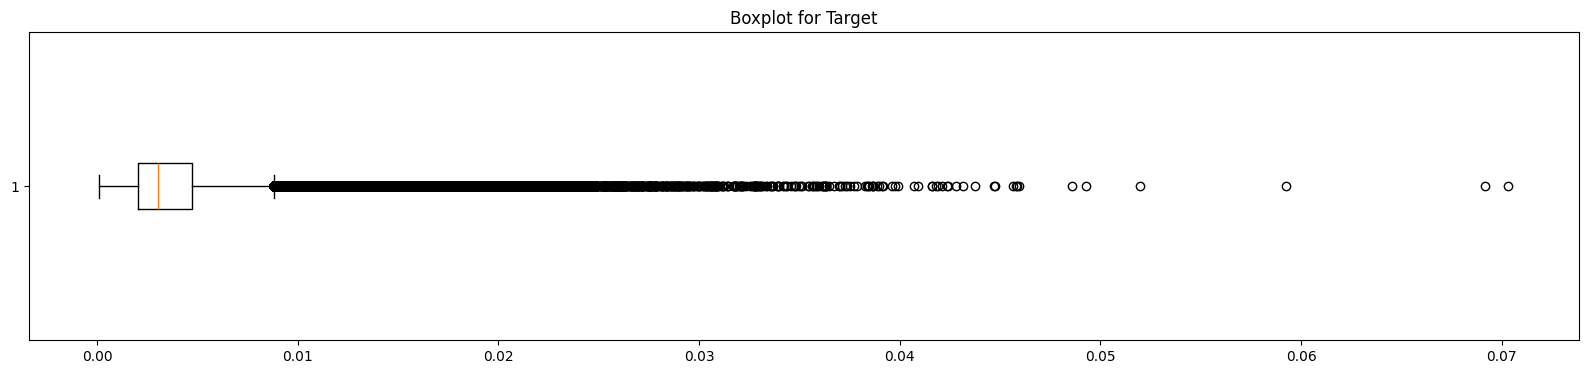

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

result["target"].plot(kind="hist", bins=30, ax=axs[0], title="Target Distribution")
result["target"].apply(np.log).plot(kind="hist", bins=100, ax=axs[1], title="log-transformed(for skewness) Target Distribution")

plt.figure(figsize=(20, 4))
plt.boxplot(result["target"], vert=False)
plt.title("Boxplot for Target")
plt.show()